## Module 1 Homework (2025 cohort)

In this homework, we're going to download finance data from various sources and make simple calculations or analysis.

In [36]:
# # # install main library YFinance
# !pip install yfinance pandas_datareader

In [37]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

import matplotlib.pyplot as plt
import datetime

### Question 1: [Index] S&P 500 Stocks Added to the Index

**Which year had the highest number of additions?**

Using the list of S&P 500 companies from Wikipedia's [S&P 500 companies page](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies), download the data including the year each company was added to the index.

Hint: you can use [pandas.read_html](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html) to scrape the data into a DataFrame.

Steps:
1. Create a DataFrame with company tickers, names, and the year they were added.
2. Extract the year from the addition date and calculate the number of stocks added each year.
3. Which year had the highest number of additions (1957 doesn't count, as it was the year when the S&P 500 index was founded)? Write down this year as your answer (the most recent one, if you have several records).

*Context*: 
> "Following the announcement, all four new entrants saw their stock prices rise in extended trading on Friday" - recent examples of S&P 500 additions include DASH, WSM, EXE, TKO in 2025 ([Nasdaq article](https://www.nasdaq.com/articles/sp-500-reshuffle-dash-tko-expe-wsm-join-worth-buying)).

In [38]:
df_sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [39]:
df_sp500.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [40]:
df_sp500['Date added'] = pd.to_datetime(df_sp500['Date added'])
df_sp500['Year added'] = df_sp500['Date added'].dt.year
df_sp500[['Date added', 'Year added']].head()

,Date added,Year added
0,1957-03-04,1957
1,2017-07-26,2017
2,1957-03-04,1957
3,2012-12-31,2012
4,2011-07-06,2011


In [41]:
df_sp500.groupby('Year added').size().sort_values(ascending=False).iloc[0:2]

Year added
1957    53
2017    23
dtype: int64

*Additional*: How many current S&P 500 stocks have been in the index for more than 20 years? When stocks are added to the S&P 500, they usually experience a price bump as investors and index funds buy shares following the announcement.

In [42]:
df_sp500['duration_in_index'] = pd.to_datetime('today') - df_sp500['Date added']
df_sp500['duration_in_index_years'] = df_sp500['duration_in_index'].dt.days // 365

In [43]:
print('How many current S&P 500 stocks have been in the index for more than 20 years?: ', (df_sp500['duration_in_index_years'] > 20).sum())

How many current S&P 500 stocks have been in the index for more than 20 years?:  215


### Question 2. [Macro] Indexes YTD (as of 1 May 2025)

**How many indexes (out of 10) have better year-to-date returns than the US (S&P 500) as of May 1, 2025?**

Using Yahoo Finance World Indices data, compare the year-to-date (YTD) performance (1 January-1 May 2025) of major stock market indexes for the following countries:
* United States - S&P 500 (^GSPC)
* China - Shanghai Composite (000001.SS)
* Hong Kong - HANG SENG INDEX (^HSI)	
* Australia - S&P/ASX 200 (^AXJO)
* India - Nifty 50 (^NSEI)
* Canada - S&P/TSX Composite (^GSPTSE)
* Germany - DAX (^GDAXI)
* United Kingdom - FTSE 100 (^FTSE)
* Japan - Nikkei 225 (^N225)
* Mexico - IPC Mexico (^MXX)
* Brazil - Ibovespa (^BVSP)

*Hint*: use start_date='2025-01-01' and end_date='2025-05-01' when downloading daily data in yfinance

Context: 
> [Global Valuations: Who's Cheap, Who's Not?](https://simplywall.st/article/beyond-the-us-global-markets-after-yet-another-tariff-update) article suggests "Other regions may be growing faster than the US and you need to diversify."

Reference: Yahoo Finance World Indices - https://finance.yahoo.com/world-indices/

In [52]:
# Define index symbols and friendly names
index_map = {
    "^GSPC": "USA - S&P 500",
    "000001.SS": "China - Shanghai Composite",
    "^HSI": "Hong Kong - Hang Seng",
    "^AXJO": "Australia - ASX 200",
    "^NSEI": "India - Nifty 50",
    "^GSPTSE": "Canada - TSX Composite",
    "^GDAXI": "Germany - DAX",
    "^FTSE": "UK - FTSE 100",
    "^N225": "Japan - Nikkei 225",
    "^MXX": "Mexico - IPC",
    "^BVSP": "Brazil - Ibovespa"
}

start_date = "2025-01-02"
end_date = "2025-04-30"

# Download adjusted close prices
data = yf.download(list(index_map.keys()), start=start_date, end=end_date)["Close"]

[*********************100%***********************]  11 of 11 completed


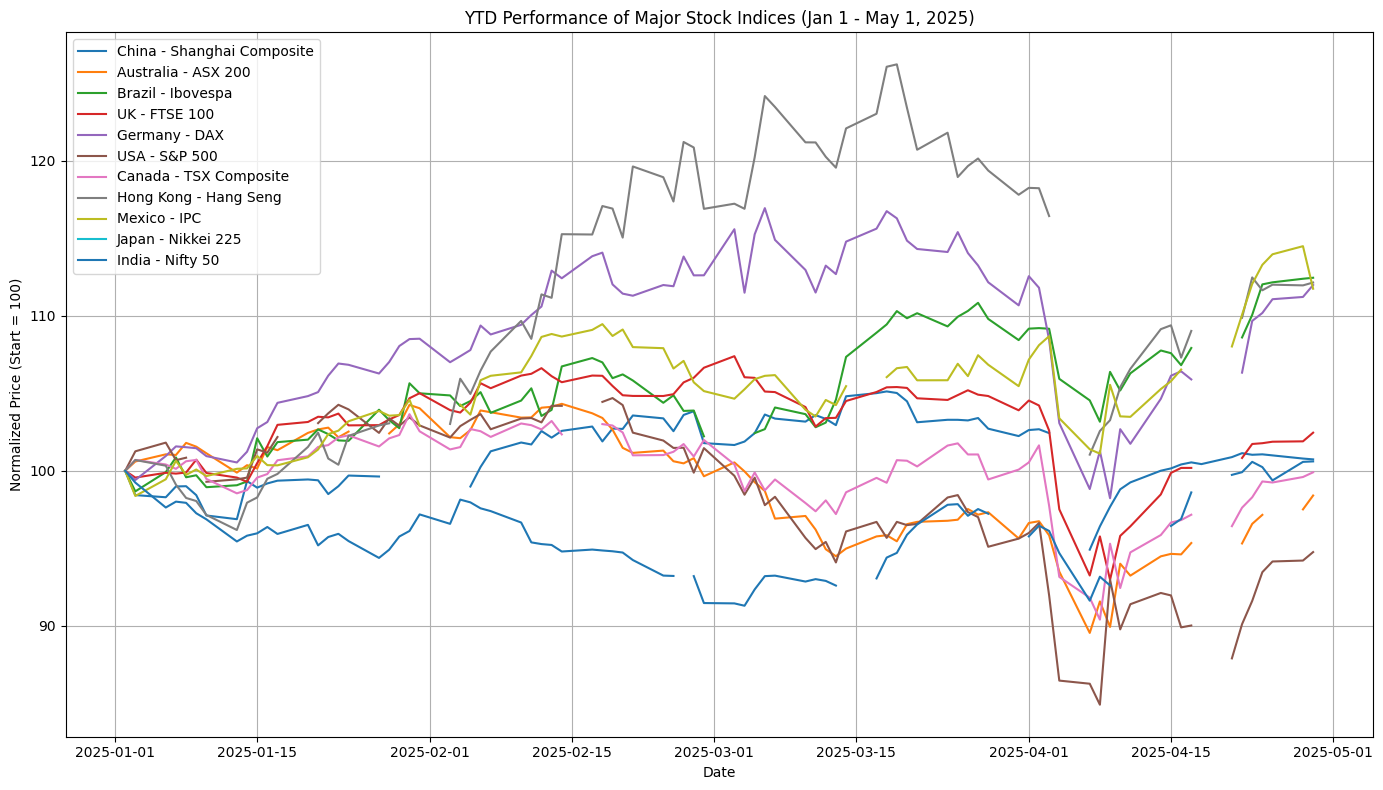

YTD Performance (Jan 1 - May 1, 2025):
Ticker
Brazil - Ibovespa             12.46%
Hong Kong - Hang Seng         12.15%
Germany - DAX                 11.99%
Mexico - IPC                  11.75%
UK - FTSE 100                  2.46%
China - Shanghai Composite     0.74%
India - Nifty 50               0.61%
Canada - TSX Composite        -0.09%
Australia - ASX 200           -1.59%
USA - S&P 500                 -5.24%
Japan - Nikkei 225              nan%
dtype: object


In [53]:
# Calculate normalized returns (starting at 100 for each index)
normalized = data / data.iloc[0] * 100

# Final performance from Jan 1 to May 1
final_returns = ((data.iloc[-1] / data.iloc[0]) - 1) * 100
final_returns.index = final_returns.index.map(index_map)

# Plot normalized performance
plt.figure(figsize=(14, 8))
for symbol in normalized.columns:
    plt.plot(normalized.index, normalized[symbol], label=index_map[symbol])
plt.title("YTD Performance of Major Stock Indices (Jan 1 - May 1, 2025)")
plt.ylabel("Normalized Price (Start = 100)")
plt.xlabel("Date")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print final YTD returns
print("YTD Performance (Jan 1 - May 1, 2025):")
print(final_returns.sort_values(ascending=False).round(2).astype(str) + "%")

In [54]:
# Compute difference in performance relative to the US (S&P 500)
us_return = final_returns["USA - S&P 500"]
relative_performance = final_returns - us_return
relative_performance.name = "Difference vs. US (S&P 500)"

# Display sorted performance differences
comparison_df = pd.DataFrame({
    "YTD Return (%)": final_returns.round(2),
    "Diff vs US (%)": relative_performance.round(2)
}).sort_values("Diff vs US (%)", ascending=False)

print("\nComparison to US Market (S&P 500):")
print(comparison_df)


Comparison to US Market (S&P 500):
                            YTD Return (%)  Diff vs US (%)
Ticker                                                    
Brazil - Ibovespa                    12.46           17.70
Hong Kong - Hang Seng                12.15           17.40
Germany - DAX                        11.99           17.23
Mexico - IPC                         11.75           17.00
UK - FTSE 100                         2.46            7.71
China - Shanghai Composite            0.74            5.98
India - Nifty 50                      0.61            5.85
Canada - TSX Composite               -0.09            5.15
Australia - ASX 200                  -1.59            3.65
USA - S&P 500                        -5.24            0.00
Japan - Nikkei 225                     NaN             NaN


*Additional*: How many of these indexes have better returns than the S&P 500 over 3, 5, and 10 year periods? Do you see the same trend?
Note: For simplicity, ignore currency conversion effects.)